In [1]:
from sklearn.linear_model import LinearRegression

from ml_tooling import Model
from ml_tooling.data import load_demo_dataset

In [2]:
# Instantiate a model with an estimator
linear_california = Model(LinearRegression())

# Instantiate the data
data = load_demo_dataset('california')
# Split training and test data
data.create_train_test()

<CaliforniaData - Dataset>

In [3]:
# Score the estimator yielding a Result object
result = linear_california.score_estimator(data)
print(result)

[22:19:30] - Scoring estimator...
<Result LinearRegression: {'r2': 0.59}>


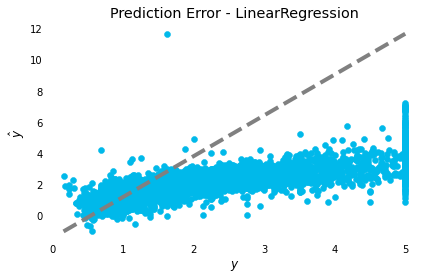

In [4]:
# Visualize the result
result.plot.prediction_error();

# Scaling

In [5]:
from sklearn.pipeline import Pipeline

from ml_tooling.transformers import DFStandardScaler

scaled = Pipeline([
    ('scale', DFStandardScaler()),
    ('model', LinearRegression())
])

In [6]:
scaled_linear = Model(scaled)
result = scaled_linear.score_estimator(data)
result

[22:19:31] - Scoring estimator...


<Result LinearRegression: {'r2': 0.59}>

<AxesSubplot:title={'center':'Prediction Error - LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

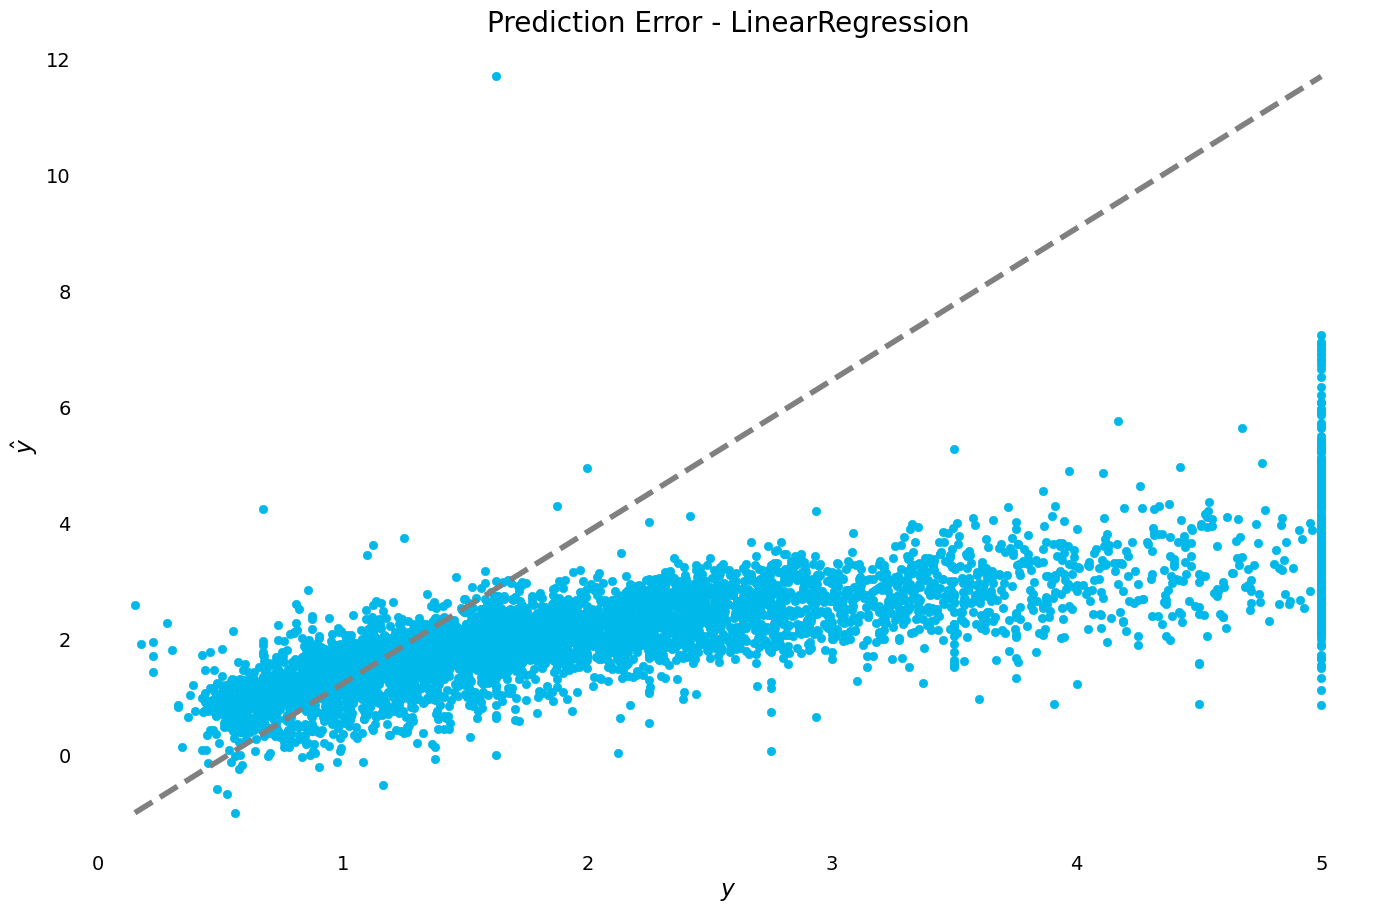

In [7]:
result.plot.prediction_error()

<AxesSubplot:title={'center':'Residual Plot - LinearRegression'}, xlabel='Predicted Value', ylabel='Residuals'>

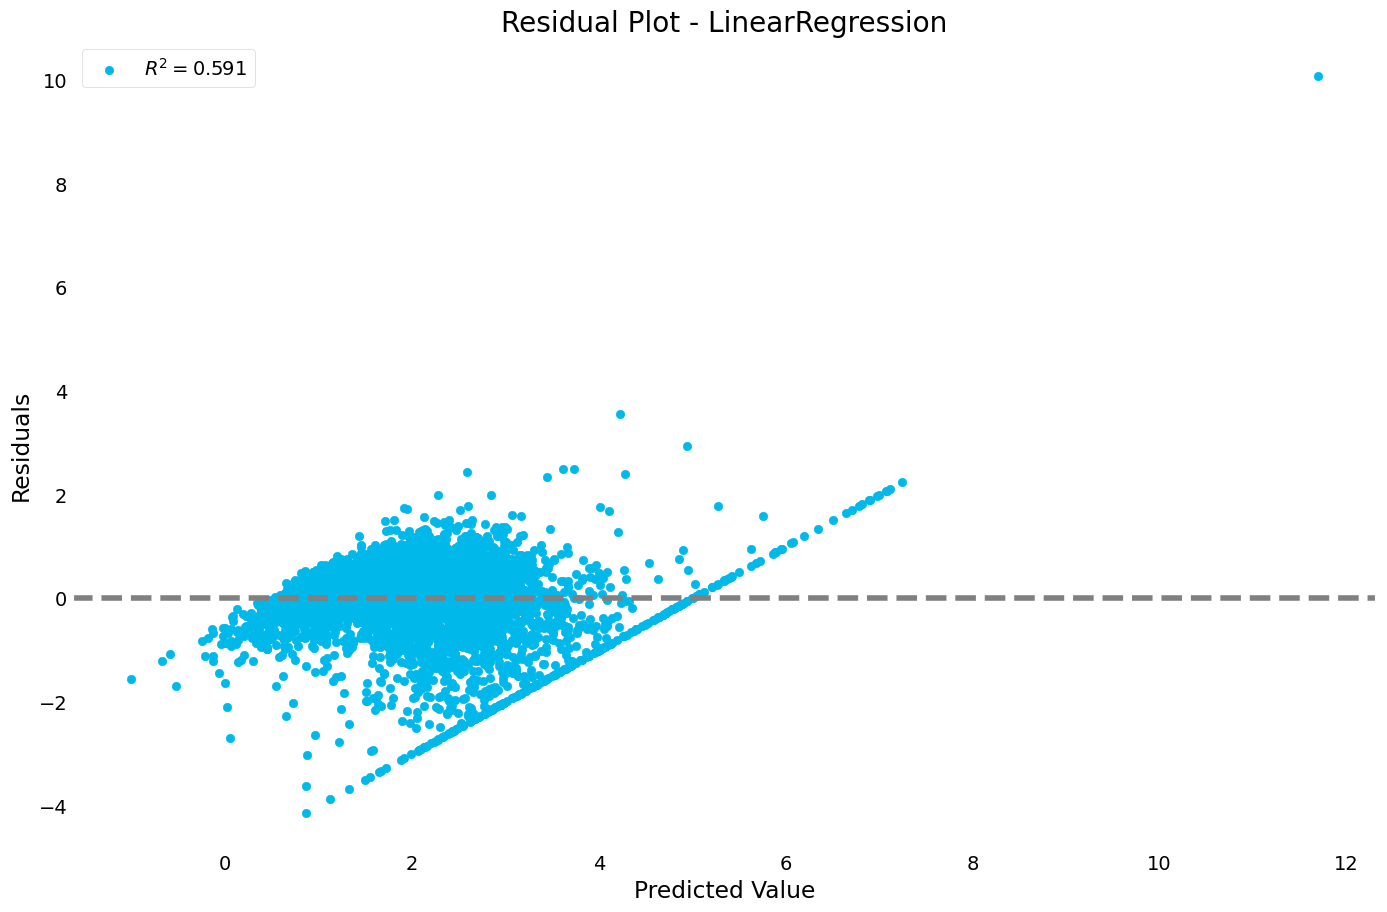

In [8]:
result.plot.residuals()

In [9]:
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from ml_tooling.transformers import Select

In [10]:
def create_pipeline(estimator):
    return Pipeline([
        ('select', Select(['MedInc', 'HouseAge','AveRooms', 'AveBedrms', 'Latitude', 'Longitude'])),
        ('scaler', DFStandardScaler()),
        ('estimator', estimator)
    ])

In [14]:
estimators = [create_pipeline(est)
              for est
              in [LinearRegression(),
                  RidgeCV(cv=100),
                  ElasticNetCV(cv=100),
                 RandomForestRegressor(n_estimators=100)]
             ]
best_model, results = Model.test_estimators(data, estimators)

[22:20:58] - Training estimator 1/4: LinearRegression
[22:20:58] - Scoring estimator...
[22:20:58] - Training estimator 2/4: RidgeCV
[22:20:58] - Scoring estimator...
[22:20:59] - Training estimator 3/4: ElasticNetCV
[22:20:59] - Scoring estimator...
[22:21:01] - Training estimator 4/4: RandomForestRegressor
[22:21:01] - Scoring estimator...
[22:21:08] - Best estimator: RandomForestRegressor - r2: 0.8008718420657055


<AxesSubplot:title={'center':'Residual Plot - RandomForestRegressor'}, xlabel='Predicted Value', ylabel='Residuals'>

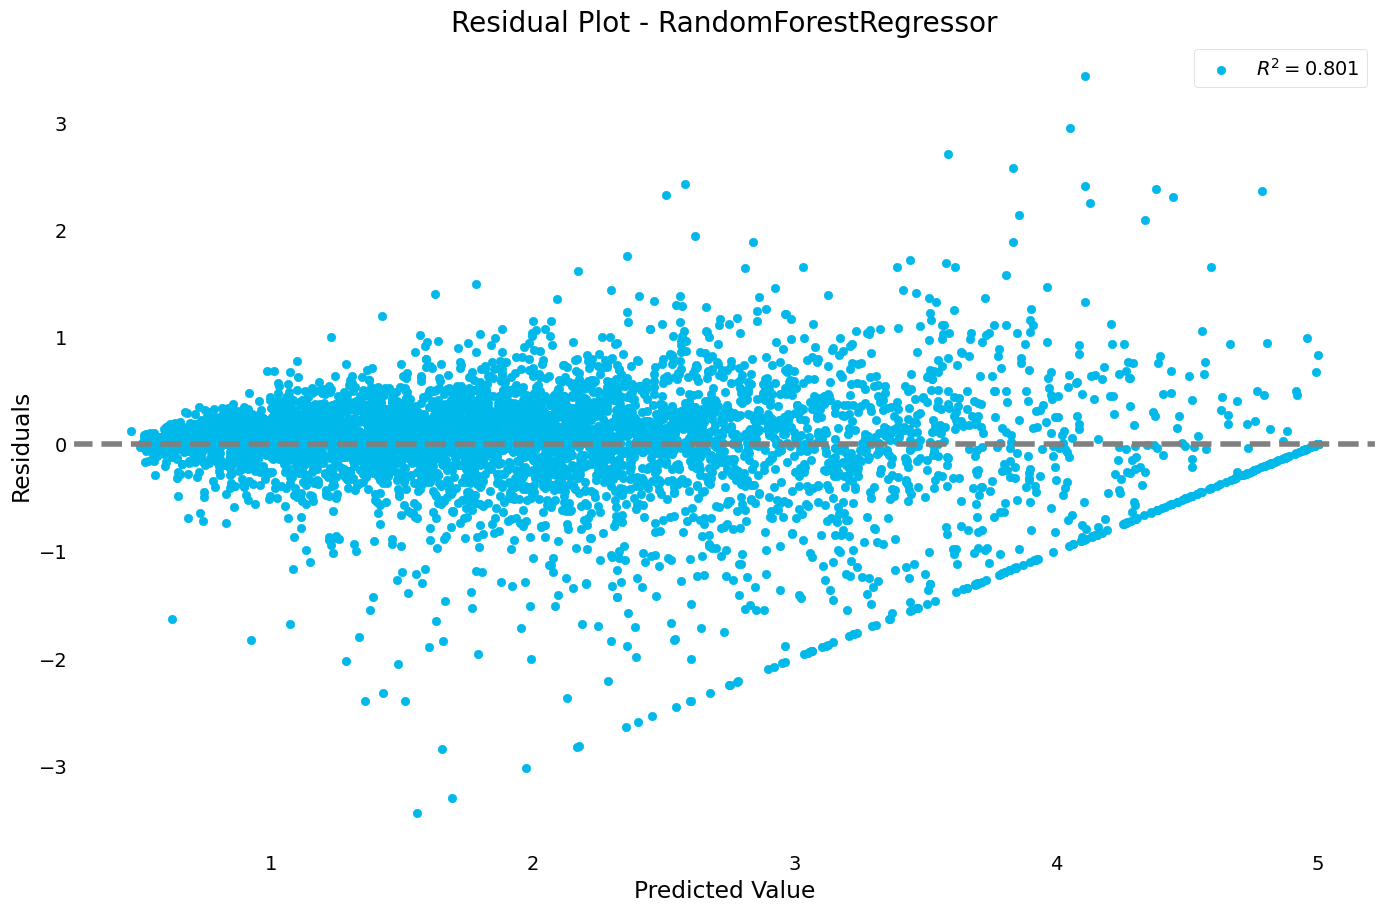

In [15]:
results.plot.residuals()

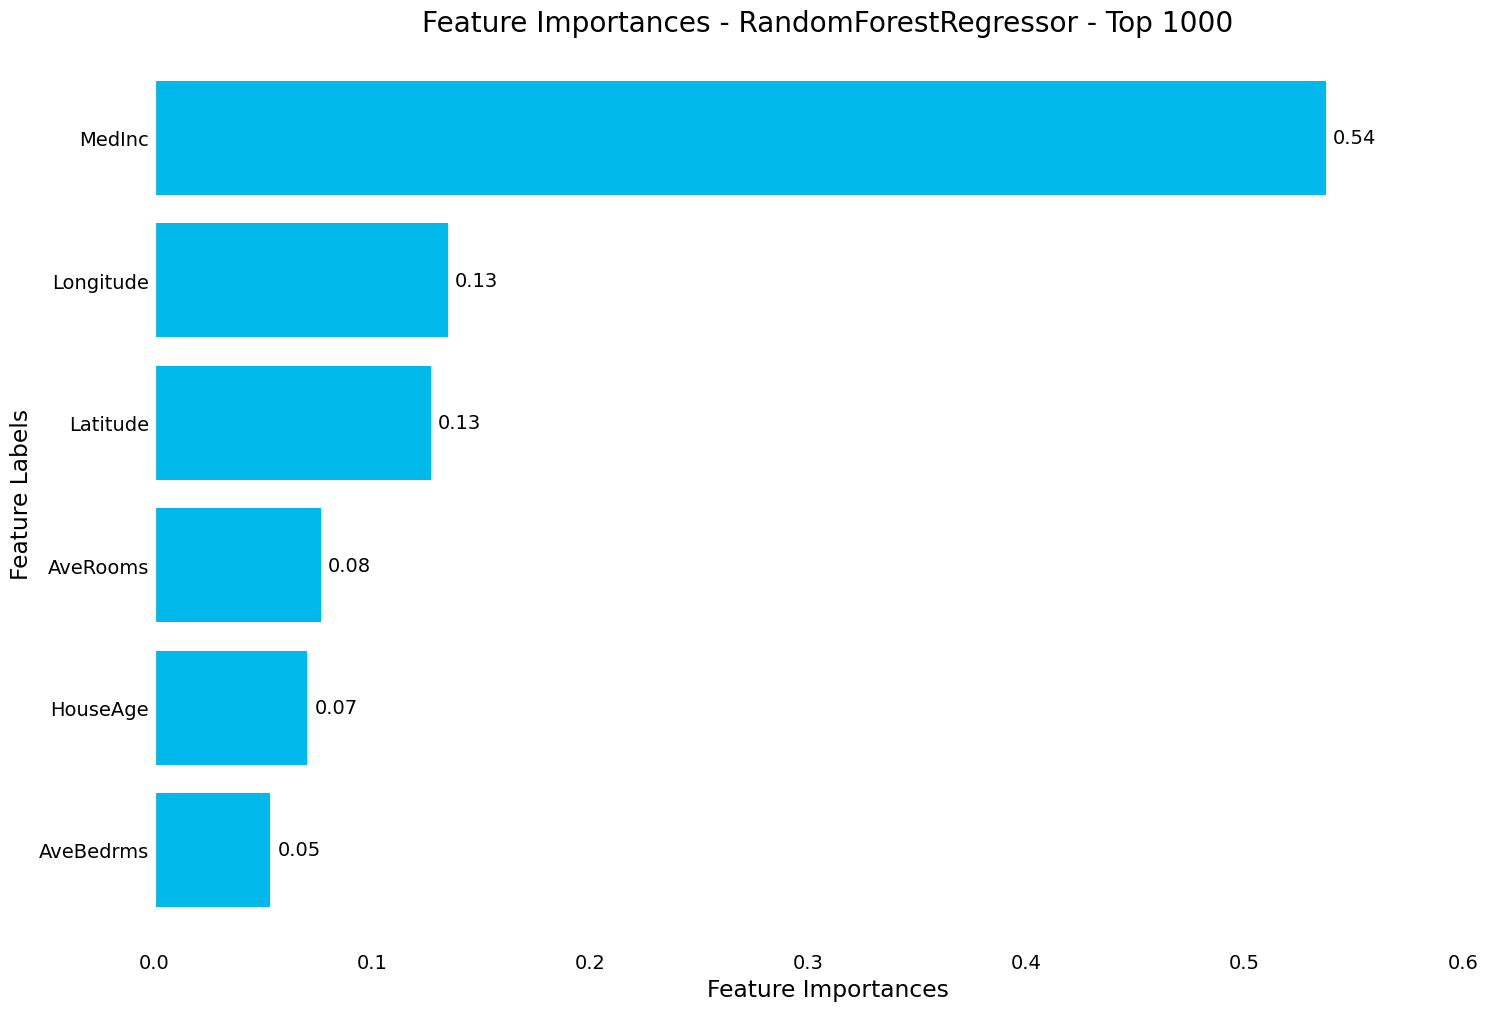

In [17]:
results.plot.feature_importance(1000);